## Imports

In [2]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## Data loading

In [3]:
df = pd.read_csv("/kaggle/input/dsaa-6100-movie-review-sentiment-classification/movie_reviews/movie_reviews.csv")
df.head()

,text,label
0,If you havent seen this movie than you need to...,1
1,but Cinderella gets my vote not only for the w...,0
2,This movie is pretty cheesy but I do give it c...,1
3,I have not seen a Van Damme flick for a while ...,1
4,This is a sleeper It defines Nicholas Cage The...,1


## Data common features

In [4]:
df.shape

(40000, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [6]:
df.describe()

,label
count,40000.000000
mean,0.498775
std,0.500005
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [7]:
df.columns

Index(['text', 'label'], dtype='object')

In [8]:
df.dtypes

text     object
label     int64
dtype: object

In [13]:
df["text"].isnull().sum()

0

## Distributions

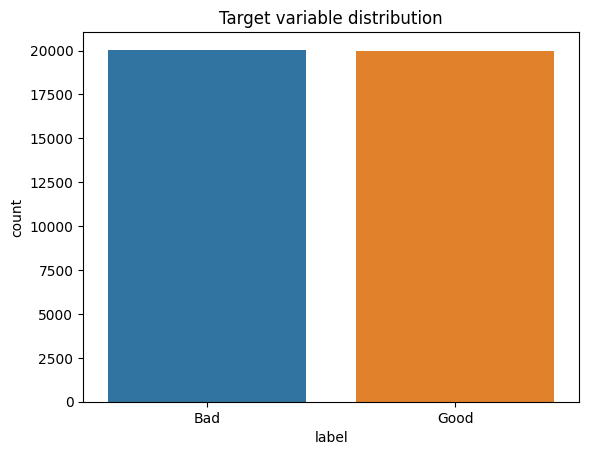

label
0    50.1225
1    49.8775
Name: proportion, dtype: float64


In [16]:
sns.countplot(x='label', data=df)
plt.title("Target variable distribution")
plt.xticks([0, 1], ['Bad', 'Good'])
plt.savefig("target_distribution.png")
plt.show()

print(df['label'].value_counts(normalize=True) * 100)

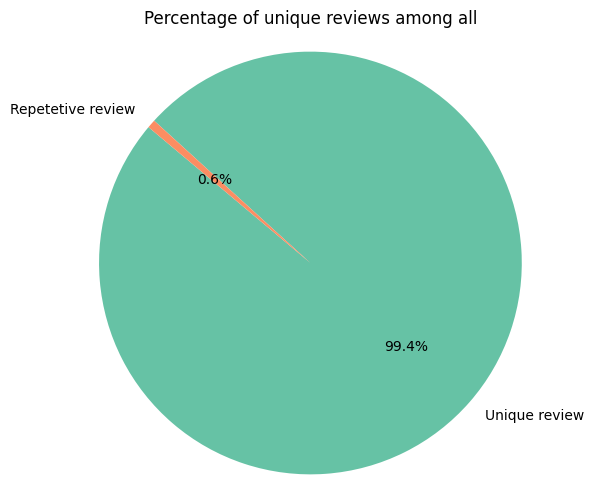

In [20]:
all_questions = df["text"]

unique_count = all_questions.nunique()
total_count = all_questions.shape[0]
duplicate_count = total_count - unique_count

labels = ['Unique review', 'Repetetive review']
sizes = [unique_count, duplicate_count]
colors = ['#66c2a5', '#fc8d62']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%.1f%%', startangle=140)
plt.title("Percentage of unique reviews among all")
plt.axis('equal')
plt.savefig("unique.png")
plt.show()

In [23]:
texts = df["text"]
print("Unique reviews:", texts.nunique(), "among", len(texts))

top_texts = texts.value_counts().head(10)
print()
print("Top 10 texts")
print(top_texts)

Unique reviews: 39742 among 40000

Top 10 texts
text
Loved todays show It was a variety and not solely cooking which would have been great too Very stimulating and captivating always keeping the viewer peeking around the corner to see what was coming up next She is as down to earth and as personable as you get like one of us which made the show all the more enjoyable Special guests who are friends as well made for a nice surprise too Loved the first theme and that the audience was invited to play along too I must admit I was shocked to see her come in under her time limits on a few things but she did it and by golly Ill be writing those recipes down Saving time in the kitchen means more time with family Those who havent tuned in yet find out what channel and the time I assure you that you wont be disappointed                                                                                                                                                                                    

In [26]:
df.iloc[0]["text"]

'If you havent seen this movie than you need to It rocks and you have to watch it It is so funny and will make you laugh your guts out so you have to watch it and i saw it about a billion and a half times and still think it is funny so you have to yes i have memorized the whole movie and could quote it to you from start to finish you must see this move it is also cute because it is half a chick flick if you dont watch it then you are really missing outthis movie even has cute guys in it and that is always a bonus so in summary watch the movie now and trust me you will not be making a mistake did i mention the music is good too So you should like it if you enjoy music This is a movie that they rated correctly and it will work for anyone'

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


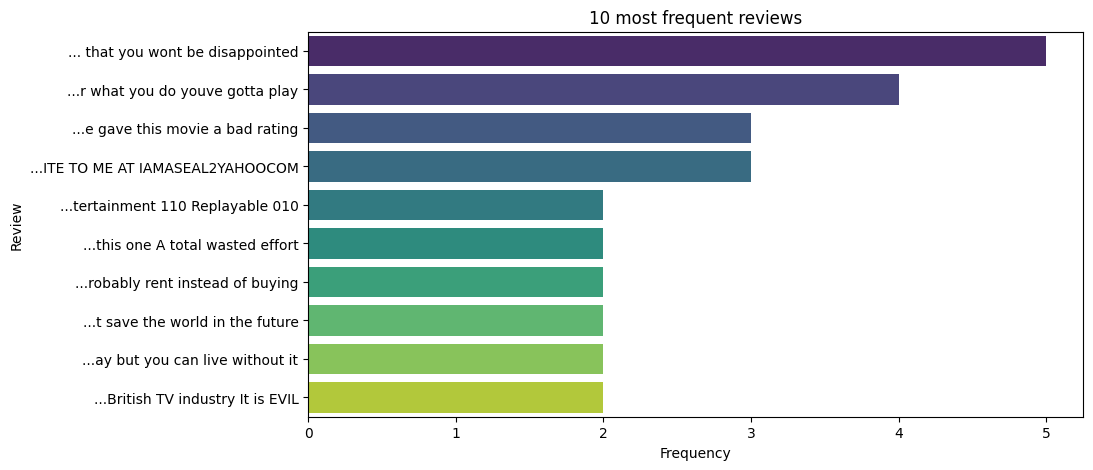

In [30]:
texts = df["text"]
top_q = texts.value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_q.values, y=["..."+ x[-30:] for x in top_q.index], palette='viridis')
plt.title("10 most frequent reviews")
plt.xlabel("Frequency")
plt.ylabel("Review")
plt.savefig("most_frequent_reviews.png")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


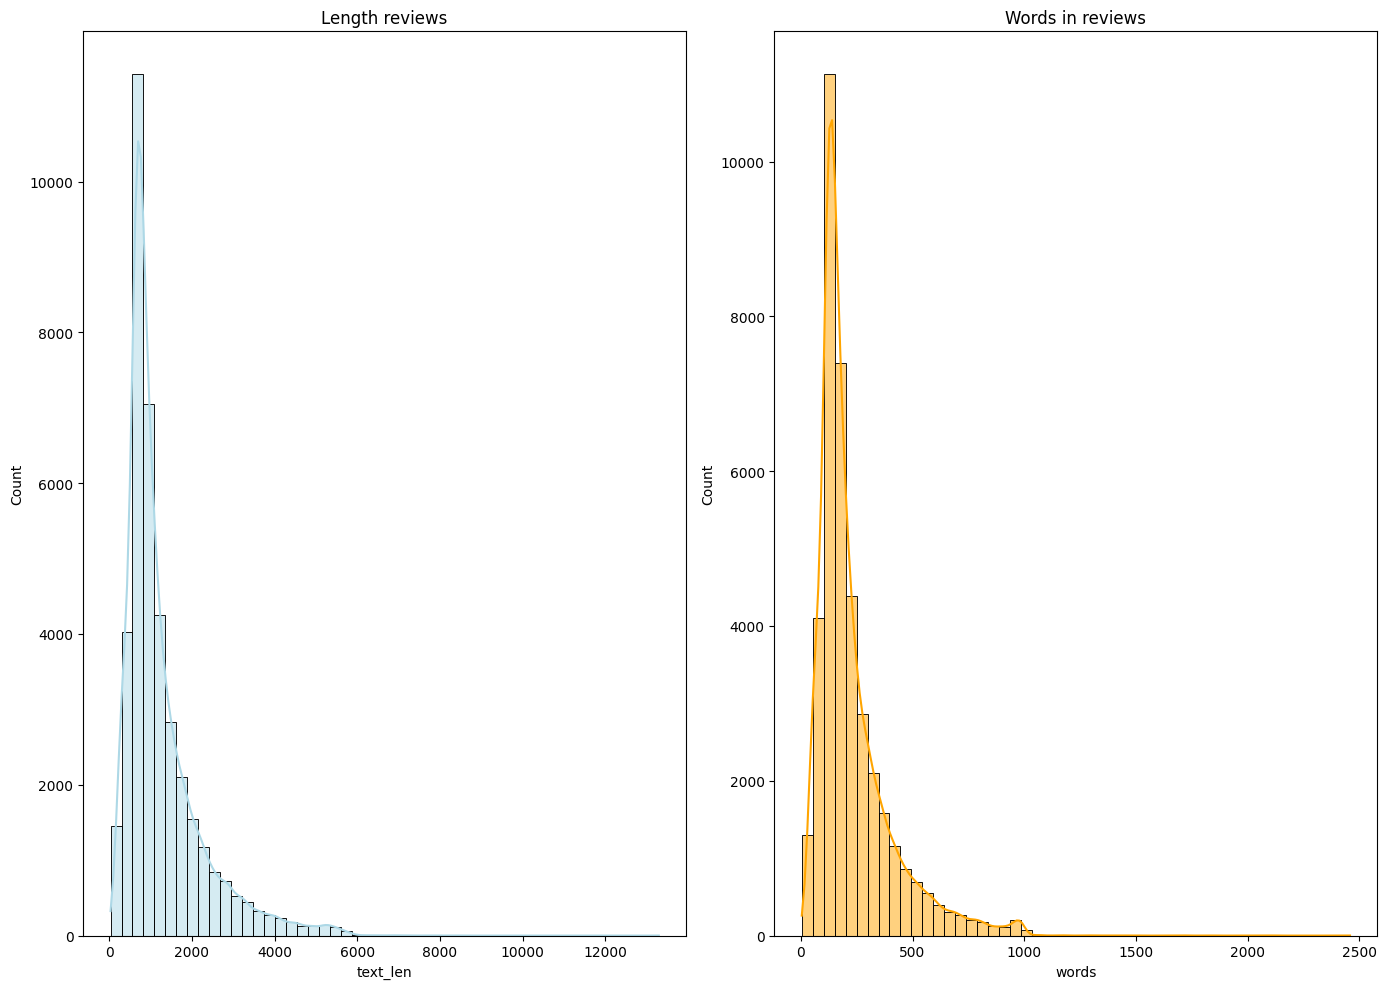

In [36]:
df['text_len'] = df['text'].astype(str).apply(len)
df['words'] = df['text'].astype(str).apply(lambda x: len(x.split()))

fig, axes = plt.subplots(1, 2, figsize=(14, 10))
sns.histplot(df['text_len'], bins=50, ax=axes[0], color='lightblue', kde=True)
axes[0].set_title("Length reviews")

sns.histplot(df['words'], bins=50, ax=axes[1], color='orange', kde=True)
axes[1].set_title("Words in reviews")

plt.tight_layout()
plt.savefig("words.png")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

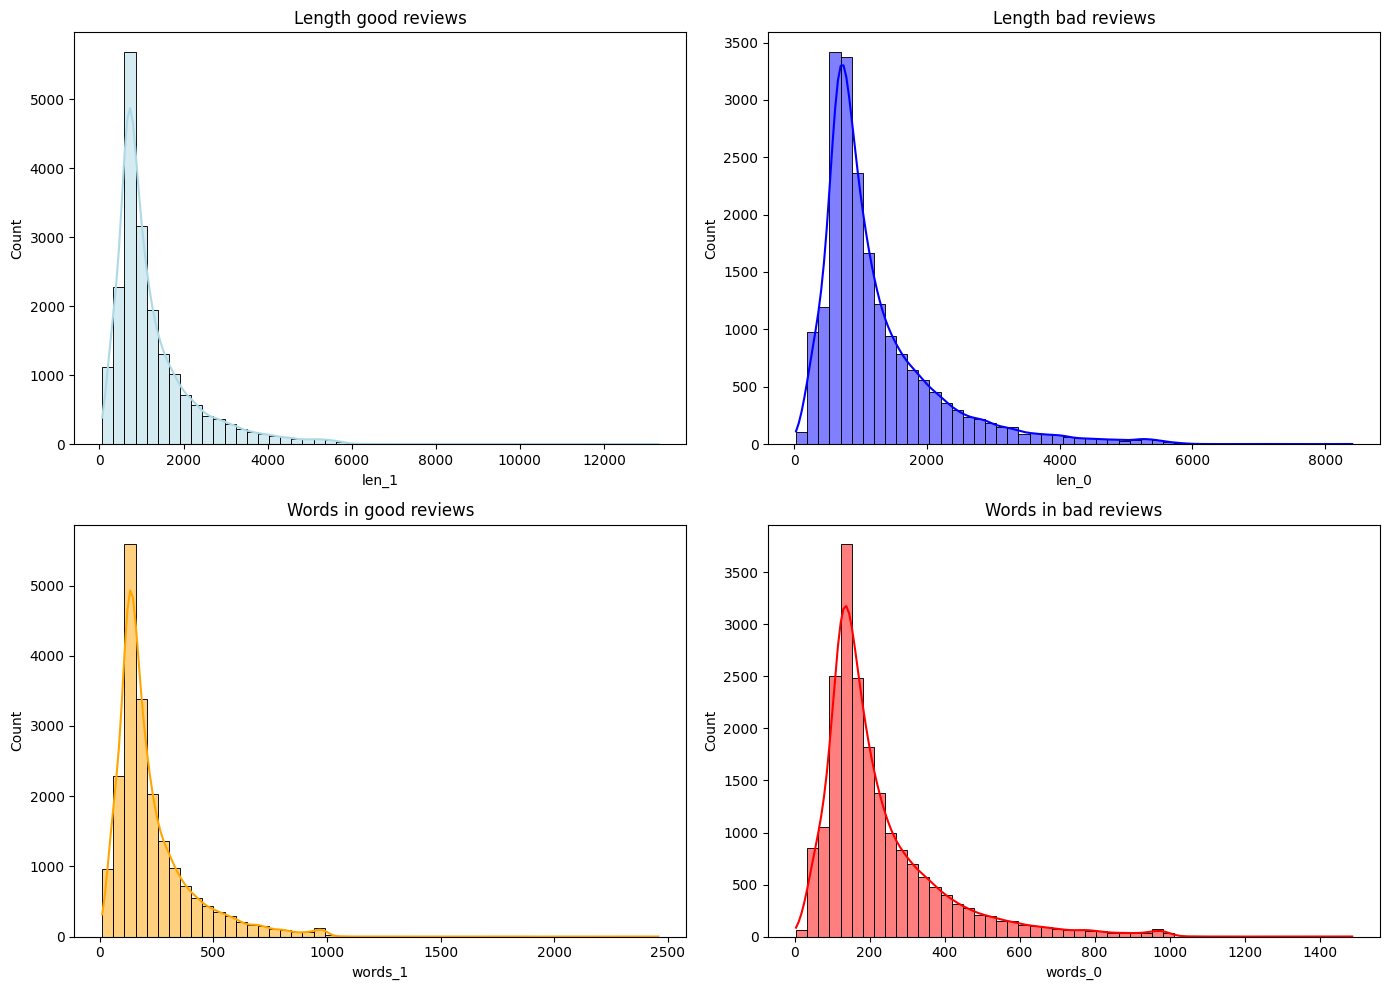

In [38]:
good = df[df["label"] == 1]
bad = df[df["label"] == 0]

df['len_1'] = good['text'].astype(str).apply(len)
df['len_0'] = bad['text'].astype(str).apply(len)
df['words_1'] = good['text'].astype(str).apply(lambda x: len(x.split()))
df['words_0'] = bad['text'].astype(str).apply(lambda x: len(x.split()))

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(df['len_1'], bins=50, ax=axes[0][0], color='lightblue', kde=True)
axes[0][0].set_title("Length good reviews")
sns.histplot(df['len_0'], bins=50, ax=axes[0][1], color='blue', kde=True)
axes[0][1].set_title("Length bad reviews")

sns.histplot(df['words_1'], bins=50, ax=axes[1][0], color='orange', kde=True)
axes[1][0].set_title("Words in good reviews")
sns.histplot(df['words_0'], bins=50, ax=axes[1][1], color='red', kde=True)
axes[1][1].set_title("Words in bad reviews")

plt.tight_layout()
plt.savefig("words2.png")
plt.show()

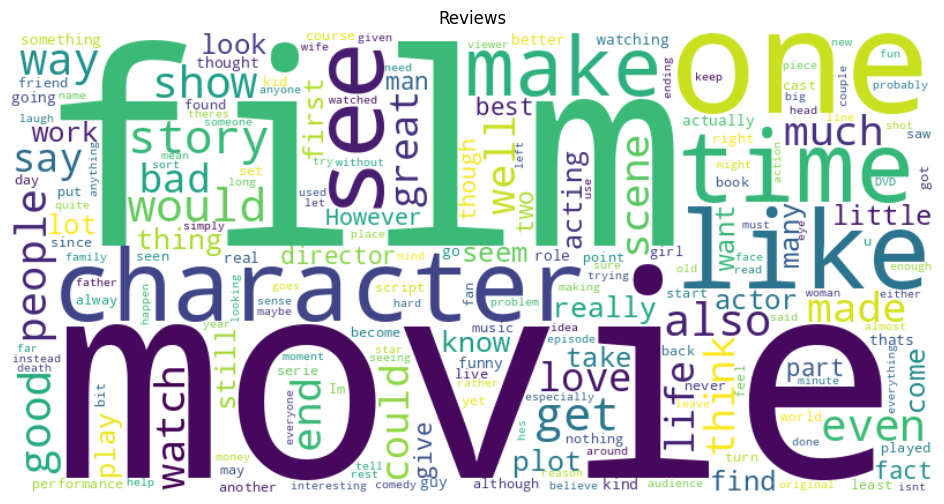

In [37]:
stop_words = set(stopwords.words("english"))

def draw_wordcloud(text_series, title):
    text = ' '.join(text_series.dropna().astype(str).values)
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.savefig(title.lower() + ".png")
    plt.show()

draw_wordcloud(df['text'], "Reviews")